###Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###Uploading the file

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Predict Hair Fall.csv to Predict Hair Fall.csv


###Initial Data Exploration

In [ ]:
dataset=pd.read_csv("Predict Hair Fall.csv")
print(dataset.shape)
print(dataset.dtypes)
print(dataset.head(5))
print(dataset.isnull().sum())
print(dataset.describe(include="all"))

(999, 13)
Id                            int64
Genetics                     object
Hormonal Changes             object
Medical Conditions           object
Medications & Treatments     object
Nutritional Deficiencies     object
Stress                       object
Age                           int64
Poor Hair Care Habits        object
Environmental Factors        object
Smoking                      object
Weight Loss                  object
Hair Loss                     int64
dtype: object
       Id Genetics Hormonal Changes Medical Conditions  \
0  133992      Yes               No            No Data   
1  148393       No               No             Eczema   
2  155074       No               No         Dermatosis   
3  118261      Yes              Yes           Ringworm   
4  111915       No               No          Psoriasis   

  Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                  No Data      Magnesium deficiency  Moderate   19   
1              An

###Hair Loss Class Distribution

/tmp/ipython-input-2530919815.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=dataset,x="Hair Loss",palette="Set3")


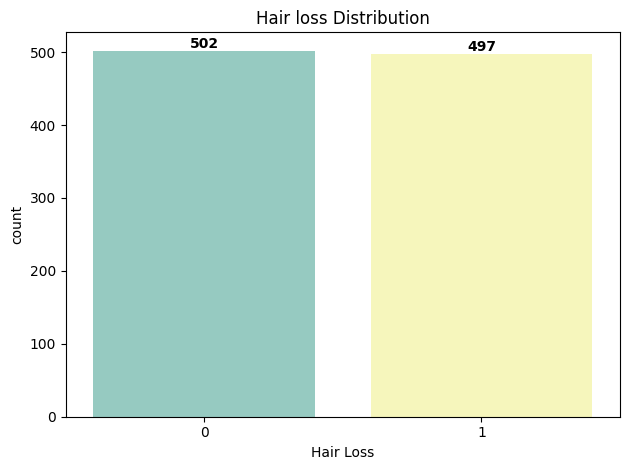

In [ ]:
ax=sns.countplot(data=dataset,x="Hair Loss",palette="Set3")
plt.title("Hair loss Distribution")
for p in ax.patches:
  count = int(p.get_height())
  ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

###Distribution of Numerical Features

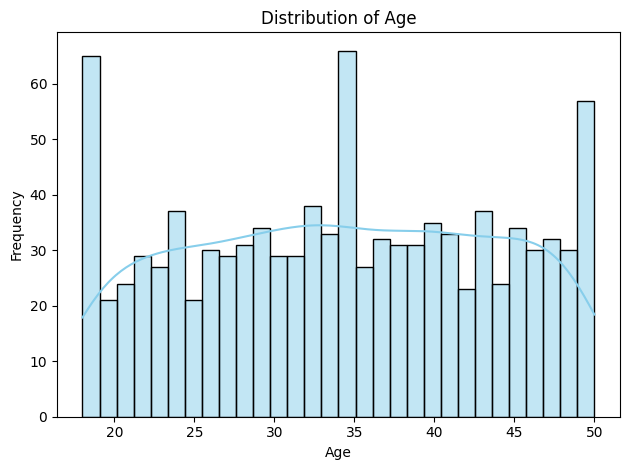

In [ ]:
num_cols =['Age']

for col in num_cols:
    sns.histplot(dataset[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

###Correlation Analysis with Hair Loss


Correlation of the matrics : 
 Hair Loss    1.000000
Age         -0.062481
Name: Hair Loss, dtype: float64


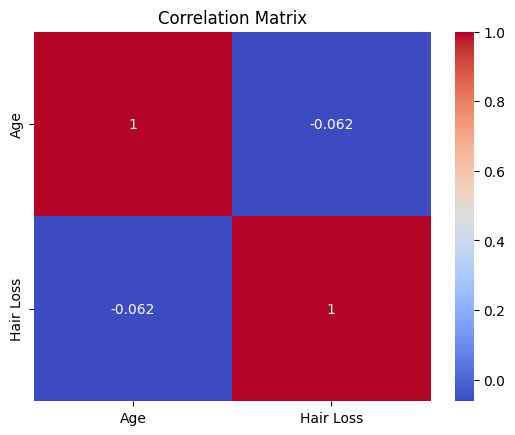

In [ ]:
corr=dataset[num_cols + ["Hair Loss"]].corr()
print("\nCorrelation of the matrics : \n",corr["Hair Loss"].sort_values(ascending=False))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

###Distribution of Categorical Features

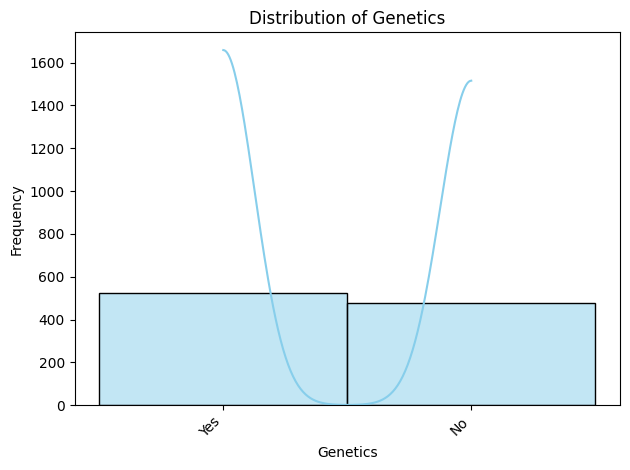

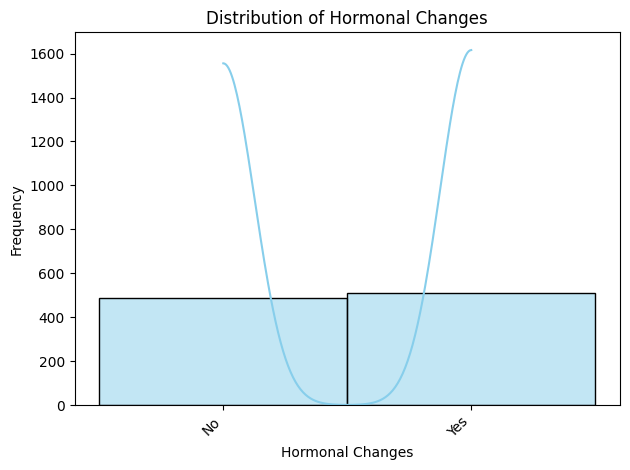

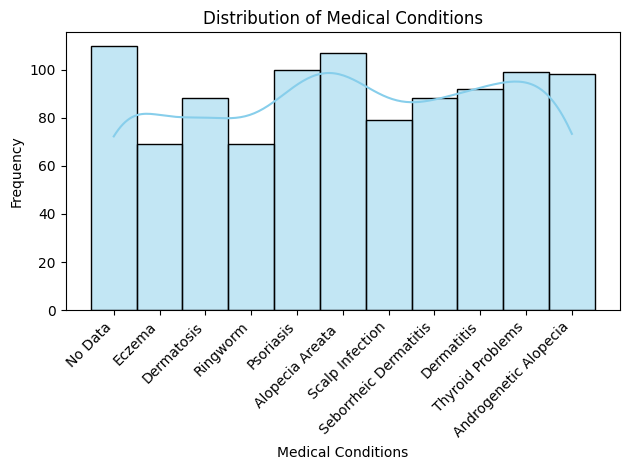

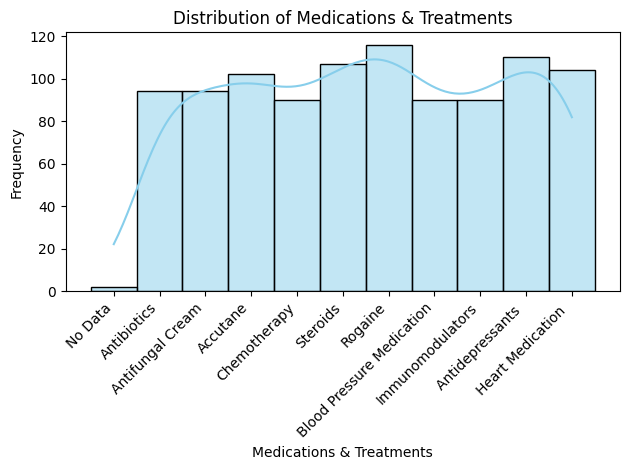

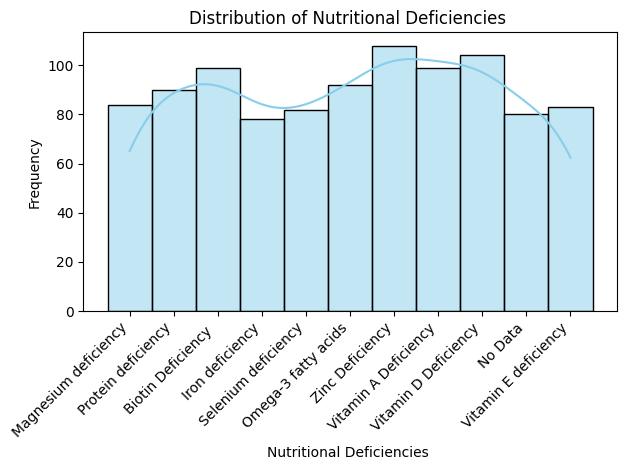

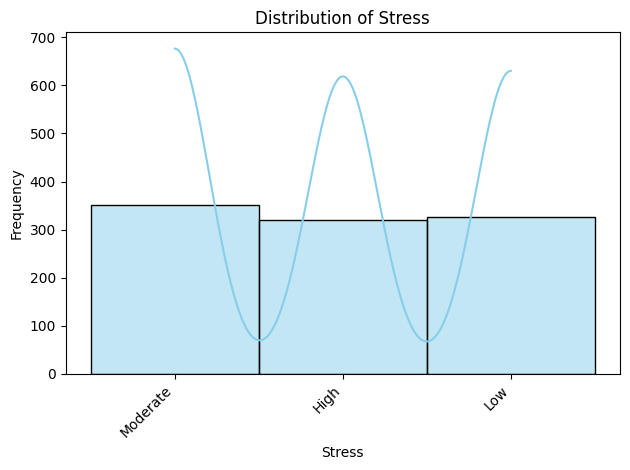

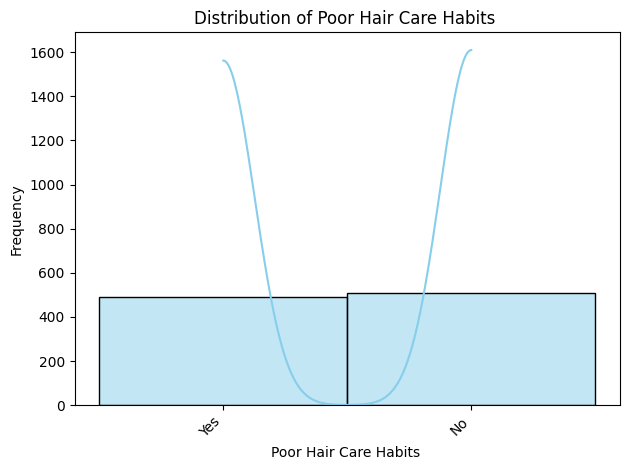

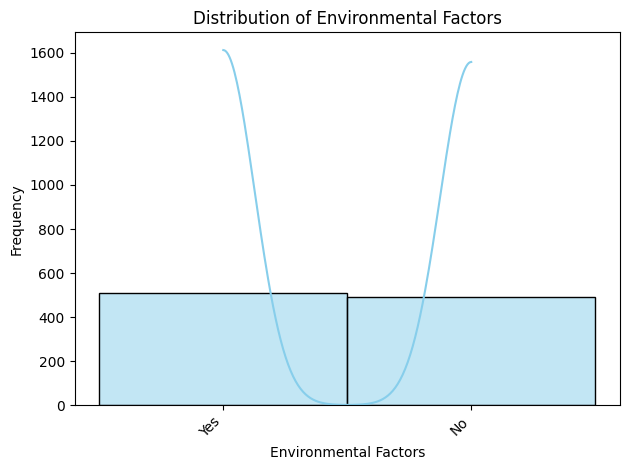

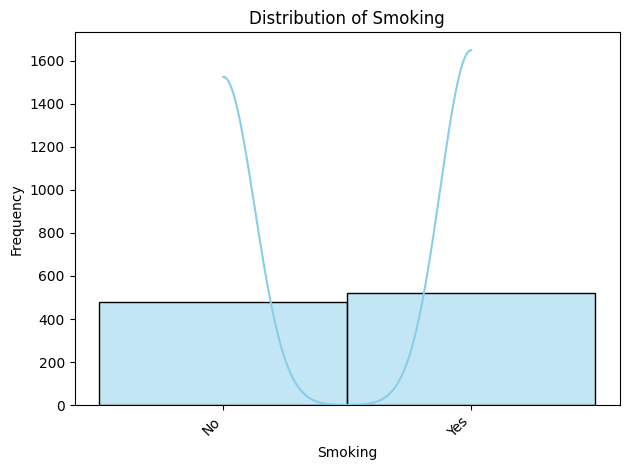

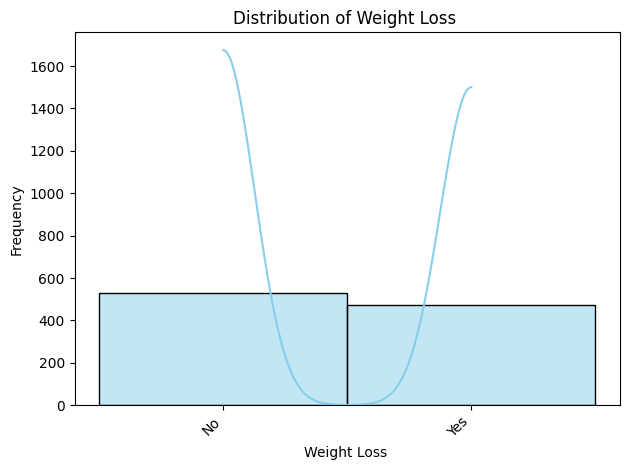

In [ ]:
cat_cols=dataset.select_dtypes(include=["object","category"]).columns
for col in cat_cols:
  sns.histplot(dataset[col],bins=30,kde=True,color="skyblue")
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

###Medical Conditions Vs Hair Loss

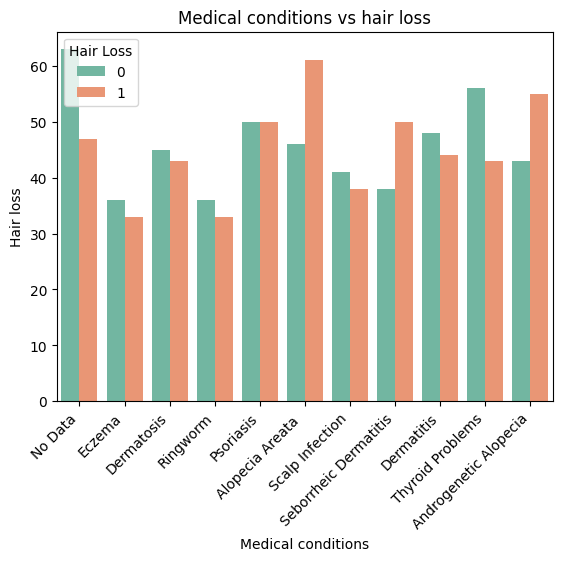

In [ ]:
sns.countplot(data=dataset,x='Medical Conditions',hue='Hair Loss',palette='Set2')
plt.title("Medical conditions vs hair loss")
plt.xlabel("Medical conditions")
plt.ylabel("Hair loss")
plt.xticks(rotation=45,ha="right")
plt.show()

###Nutritional Status Vs Hair Loss

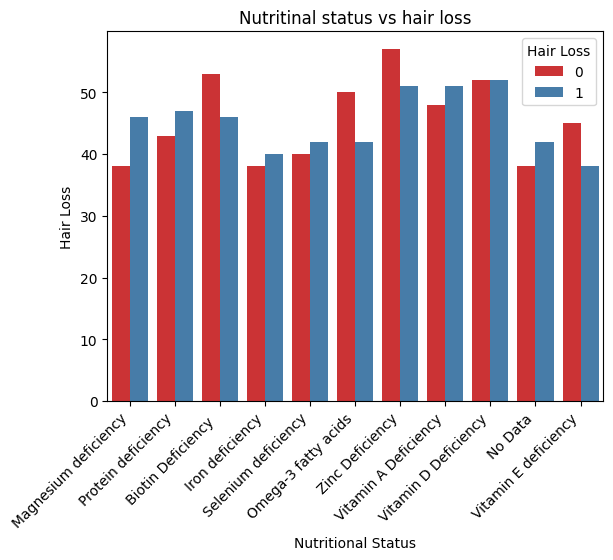

In [ ]:
sns.countplot(data=dataset,x='Nutritional Deficiencies ',hue='Hair Loss',palette="Set1")
plt.title("Nutritinal status vs hair loss")
plt.xlabel("Nutritional Status")
plt.ylabel("Hair Loss")
plt.xticks(rotation=45,ha="right")
plt.show()

###Categorical Features Vs Hair Loss

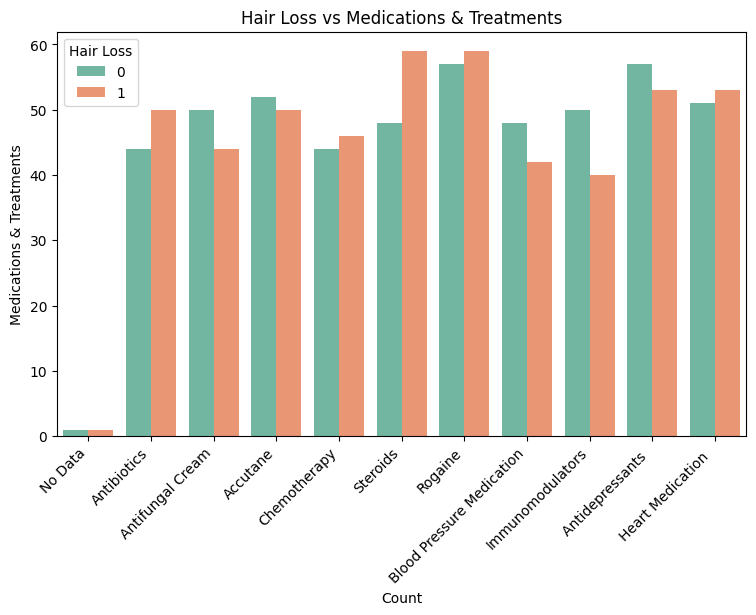

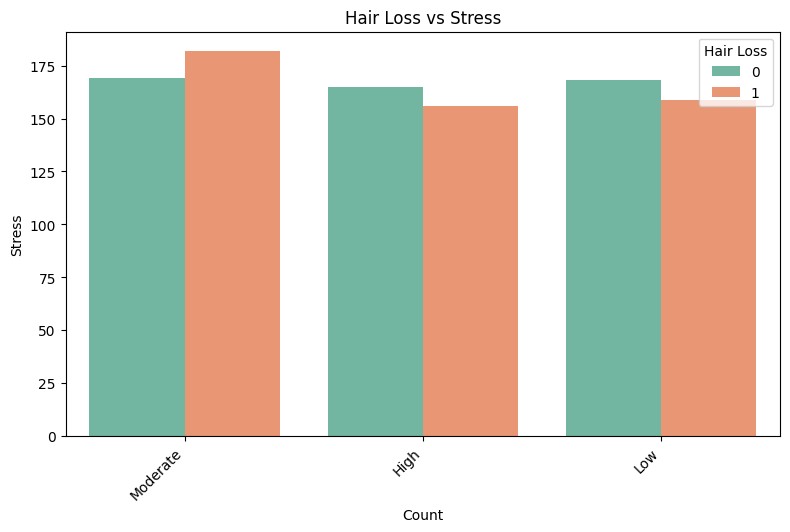

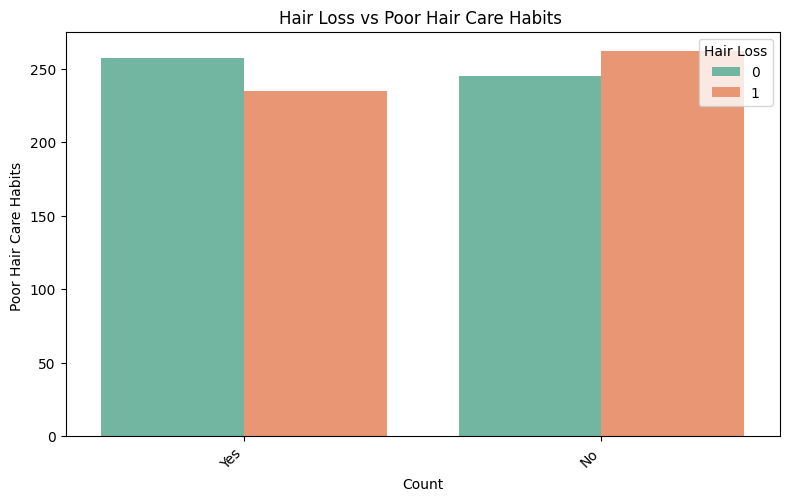

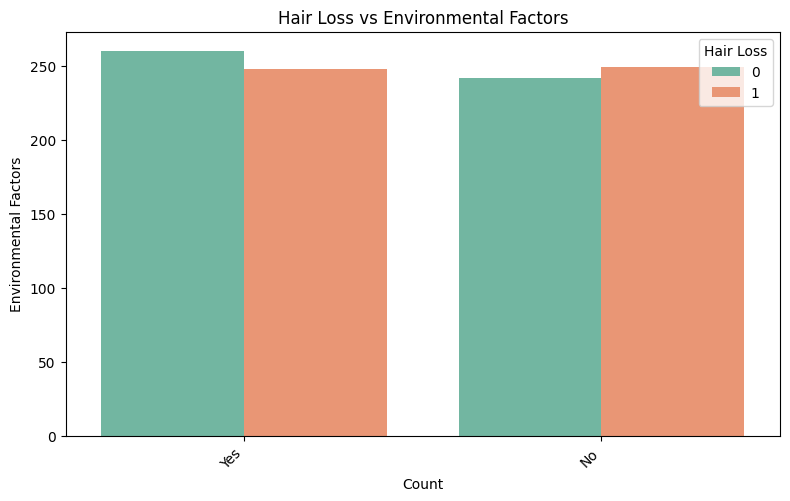

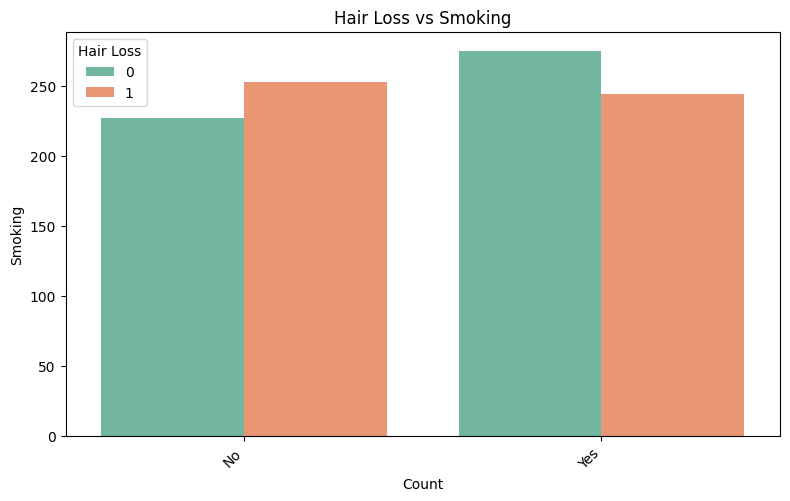

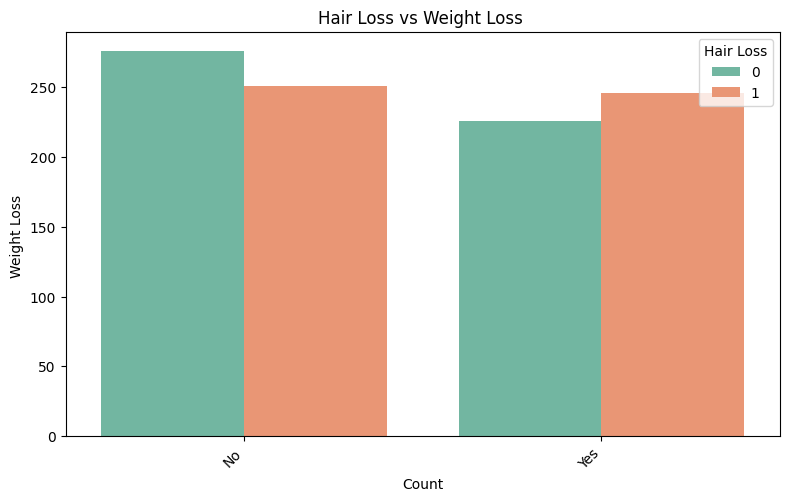

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat2_cols = [
    'Medications & Treatments',
    'Stress',
    'Poor Hair Care Habits ',
    'Environmental Factors',
    'Smoking',
    'Weight Loss '
]

# Plot horizontal bar charts for each column vs Hair Loss
for col in cat2_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dataset, x=col, hue='Hair Loss', palette="Set2")
    plt.title(f"Hair Loss vs {col}")
    plt.ylabel(col)
    plt.xlabel("Count")
    plt.tight_layout()
    plt.xticks(rotation=45,ha="right")
    plt.show()


###Feature Importance Using Logistic Regression

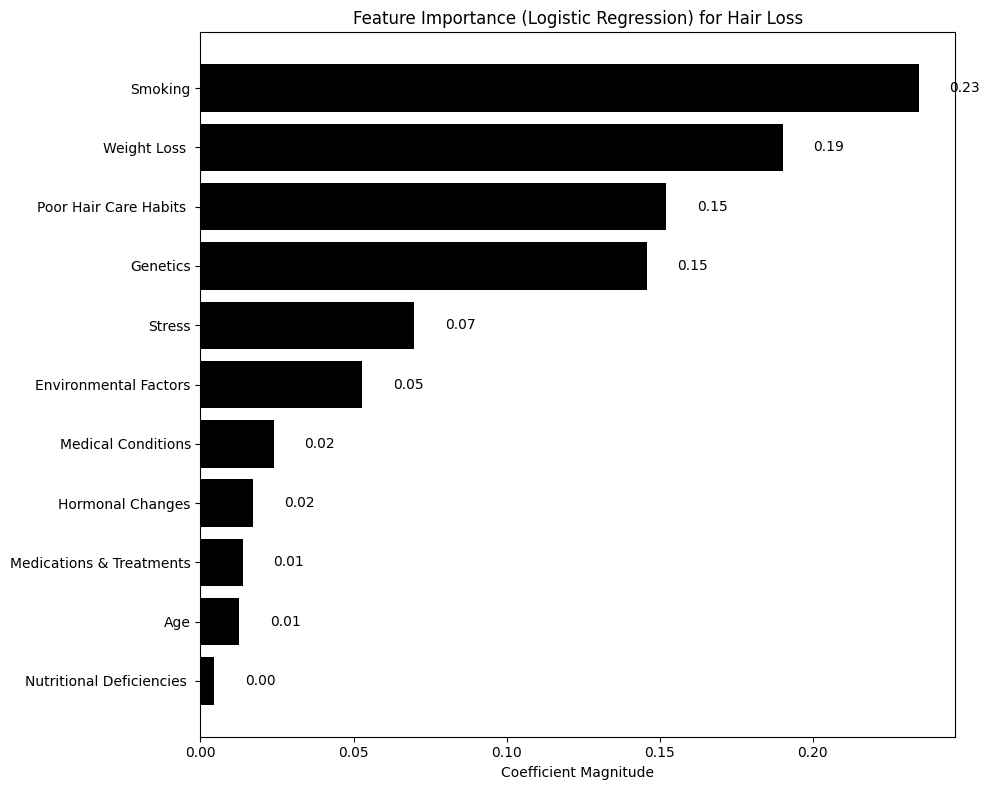

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

# Copy and preprocess dataset
df_model = dataset.copy()
df_model.drop('Id', axis=1, inplace=True)

# Encode all categorical columns
for col in df_model.select_dtypes(include='object'):
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Define features and target
X = df_model.drop('Hair Loss', axis=1)
y = df_model['Hair Loss']

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Get feature importance (absolute value of coefficients)
importances = pd.Series(abs(model.coef_[0]), index=X.columns)
importances_sorted = importances.sort_values()

# Plot feature importance
plt.figure(figsize=(10, 8))
bars = plt.barh(importances_sorted.index, importances_sorted.values, color='black')
plt.title("Feature Importance (Logistic Regression) for Hair Loss")
plt.xlabel("Coefficient Magnitude")

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()
